# Project 7 with Machine Learning
## by: Aaron Pelton
## https://github.com/hrawp/datafun-07-ml


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



##  Part 1 - Chart a Straight Line

In [137]:
# initial setup
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

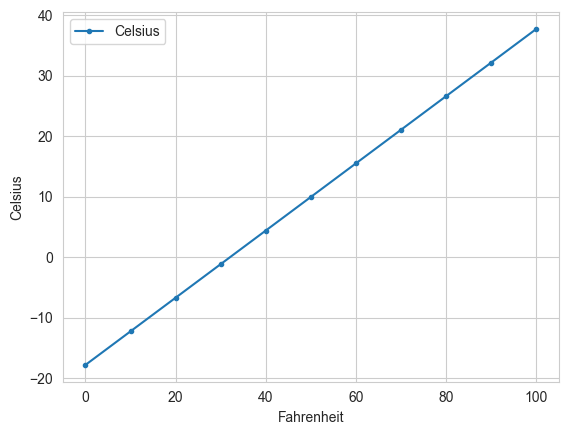

In [138]:
# creating the line
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [139]:
# Load data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [140]:
nyc_df.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [141]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [142]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
# Make the date only show the year.
nyc_df.Date = nyc_df.Date.floordiv(100)
# show the changes
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

In [143]:
# Set precision to 2
pd.set_option('display.precision', 2)
# Show the description of the data
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [144]:
# Create the y = mx + b line
linear_regression = stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)
linear_regression.slope


np.float64(0.014771361132966163)

In [145]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [146]:
# What is the predicted temperature in 2024
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

(10.0, 70.0)

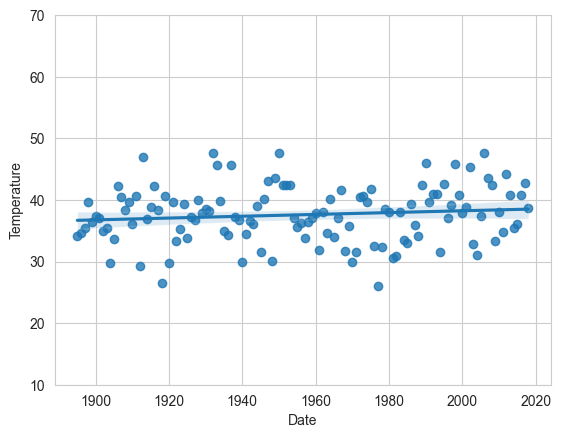

In [147]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)